In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
adult_data = pd.read_csv('adult.csv')

Data Overview

In [3]:
def data_overview(df):
    print("An overview of the dataset")
    print("----------------------------------------------------------------------------")
    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")

    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")

    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")

    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")

    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of dupliacte rows: {df.duplicated().sum()}")
    print("\n")

    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("Value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [4]:
data_overview(adult_data)

An overview of the dataset
----------------------------------------------------------------------------
shape of the dataset
----------------------------------------------------------------------------


(48842, 15)



statistical summary
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0




information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), objec

None



missing values
----------------------------------------------------------------------------


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of dupliacte rows: 52


Value counts for workclass
----------------------------------------------------------------------------
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value counts for education
----------------------------------------------------------------------------
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int6

Observations
1. Dataset has 48842 rows and 15 columns.
2. here are no missing values, however, some cells in data is represented by '?' which means there is bad data in the dataset which we will treat during pre-processing phase.
3. Dataset has 6 numeric and 9 object type columns.
4. In statistical summary, capital-gain and capital-loss have high range but 75% values for both are 0.
5. There are duplicates in the data, which we will drop during pre-processing phase.
6. income, which is the variable of interest has skewed data.

Pre-processing Data


In the dataset, the columns "education" and "educational-num" provide similar information, with one indicating the highest education level attained and the other specifying the number of years of education. Therefore, we are removing the "educational-num" column. Likewise, the columns "marital-status" and "relationship" convey largely overlapping information, so we are deleting the "relationship" column in this case.

In [5]:
adult_data_v1 = adult_data.drop(['educational-num', 'relationship'], axis = 1)
adult_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   race            48842 non-null  object
 7   gender          48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
 12  income          48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


Treating bad data

In [6]:
adult_data_v1 = adult_data_v1.replace('?', 'Unknown')
display(adult_data_v1['workclass'].value_counts())
print('\n')
display(adult_data_v1['occupation'].value_counts())
print('\n')
display(adult_data_v1['native-country'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

native-country
United-States                 43832
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

EDA
Univariate Analysis
For numeric columns

In [7]:
def univariateAnalysis_numeric(df, column):
    print(f'Skewness of{column}:', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distrubution of" + column)
    print("----------------------------------------------------------------------------")
    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)

    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

Skewness ofage: 0.5575803166133181


Distrubution ofage
----------------------------------------------------------------------------


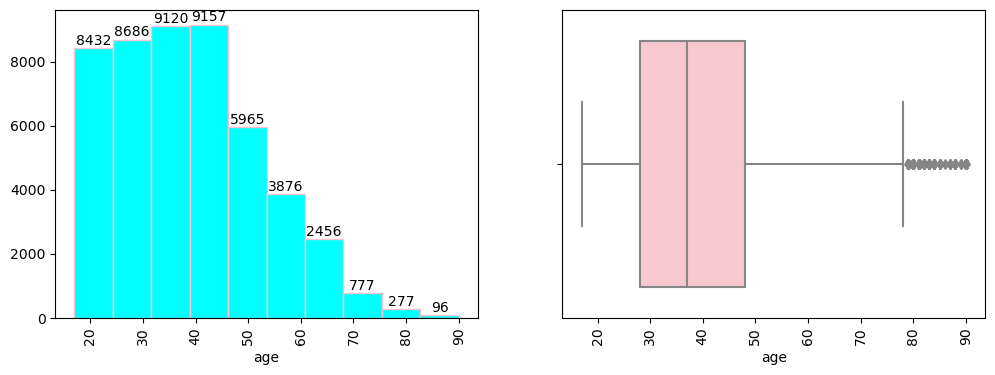

Skewness offnlwgt: 1.4388918785218416
Distrubution offnlwgt
----------------------------------------------------------------------------


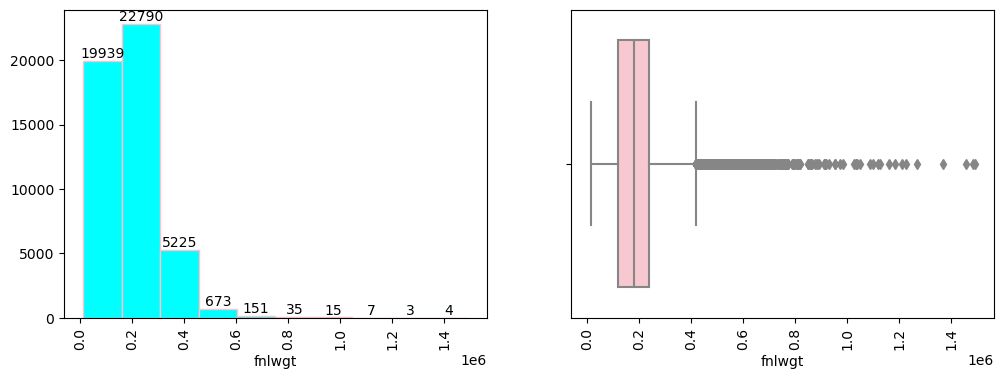

Skewness ofcapital-gain: 11.894658996587946
Distrubution ofcapital-gain
----------------------------------------------------------------------------


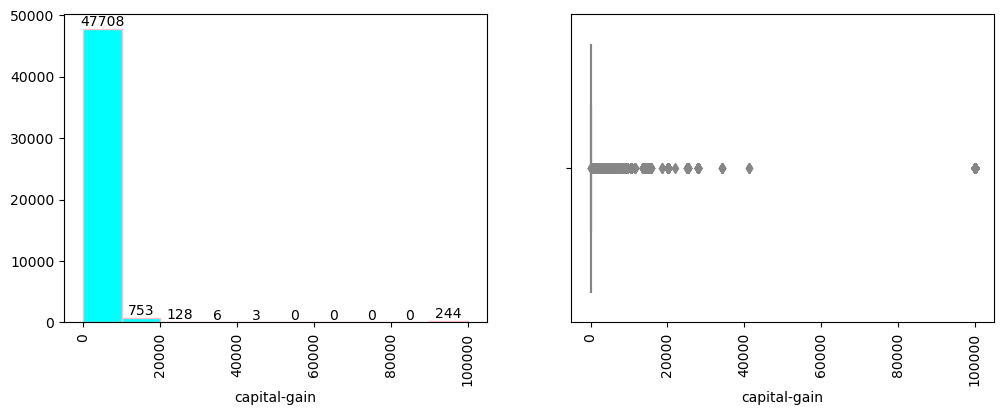

Skewness ofcapital-loss: 4.569808857738484
Distrubution ofcapital-loss
----------------------------------------------------------------------------


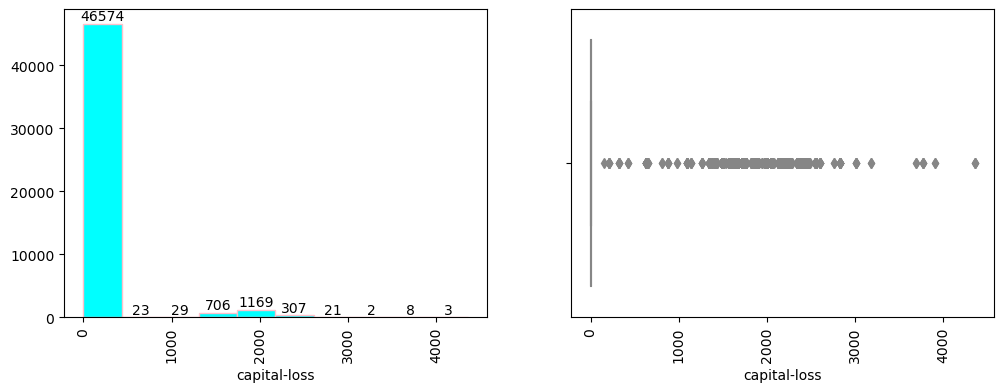

Skewness ofhours-per-week: 0.23874965720275756
Distrubution ofhours-per-week
----------------------------------------------------------------------------


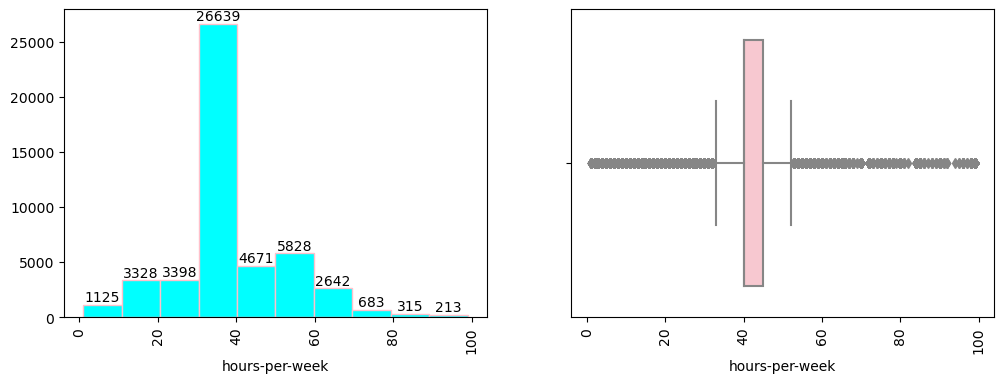

In [8]:
num_cols = adult_data_v1.select_dtypes(include = 'number').columns
for column in num_cols:
    univariateAnalysis_numeric(adult_data_v1, column)

Observations
1. For all the numeric columns there are multiple outliers, we will have to treat these outliers before applying the regression model as they can make the model biased.
2. For columns capital-gain and capital-loss data is highly skewed and there is significant number of outliers, however, from the statistical summary we know that atleast 75% values for these columns are 0. Due to this we will not treat outliers for these columns as outlier treatment could make these columns insignificant.

For categorical columns

In [9]:
def univariateAnalysis_category(df, cat_column):
    print("distribution of " + cat_column)
    print("---------------------------------")
    plt.figure()
    plt.figure(figsize=(8, 5))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

distribution of workclass
---------------------------------


<Figure size 640x480 with 0 Axes>

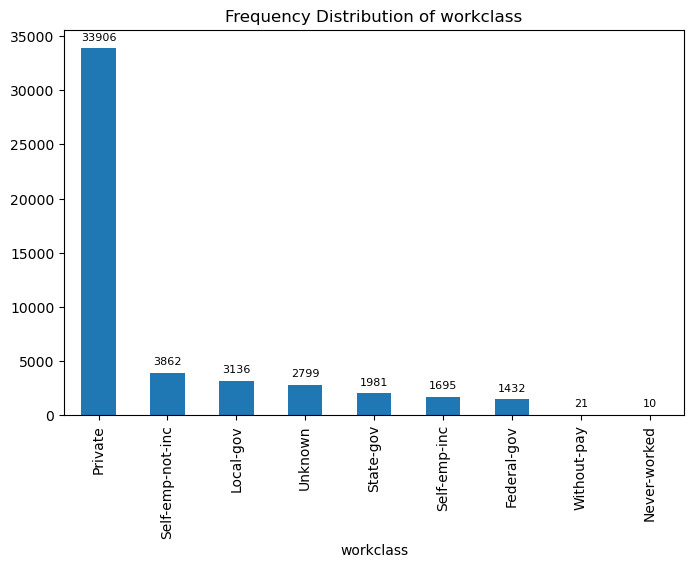

       
distribution of education
---------------------------------


<Figure size 640x480 with 0 Axes>

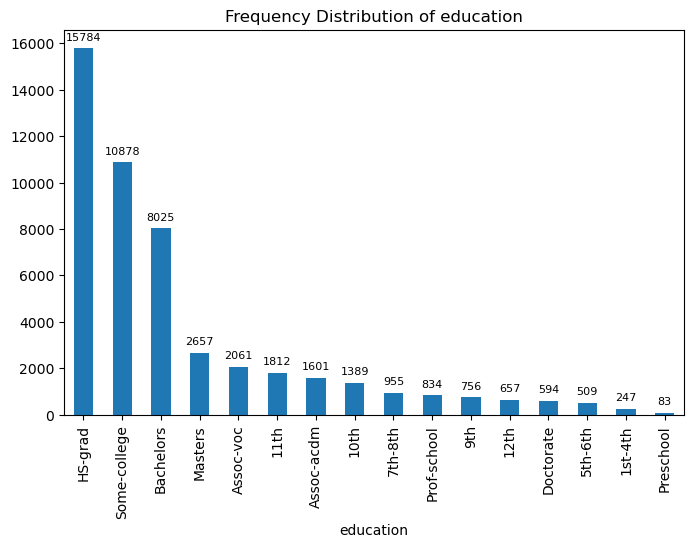

       
distribution of marital-status
---------------------------------


<Figure size 640x480 with 0 Axes>

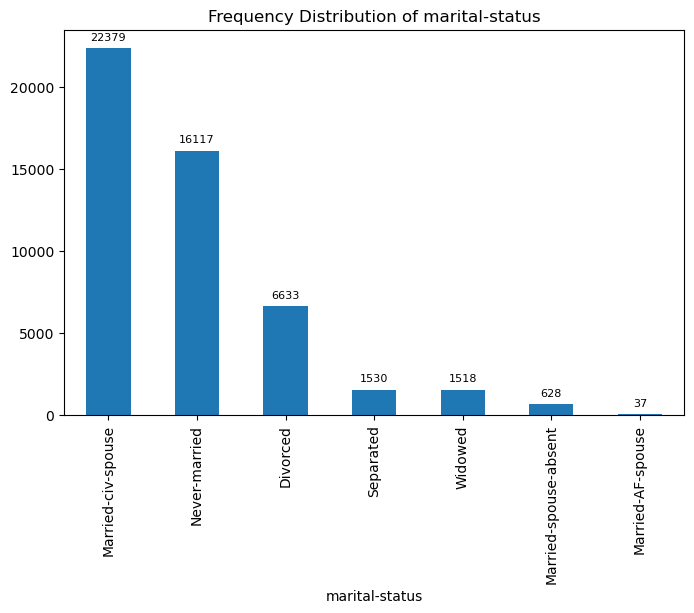

       
distribution of occupation
---------------------------------


<Figure size 640x480 with 0 Axes>

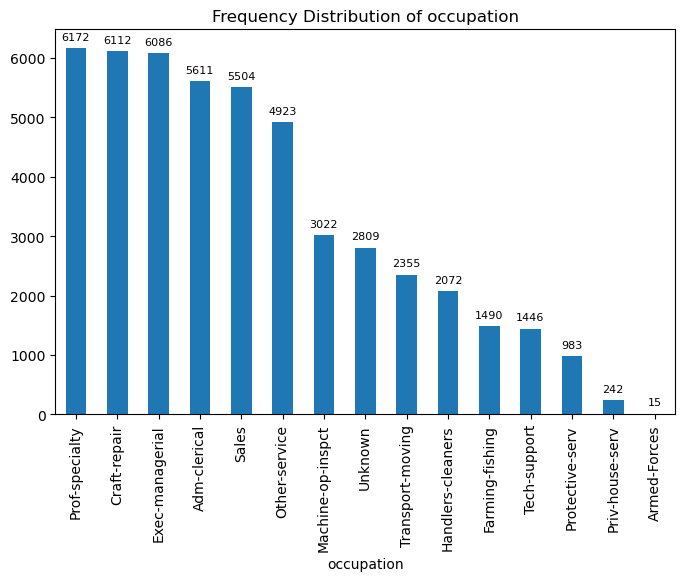

       
distribution of race
---------------------------------


<Figure size 640x480 with 0 Axes>

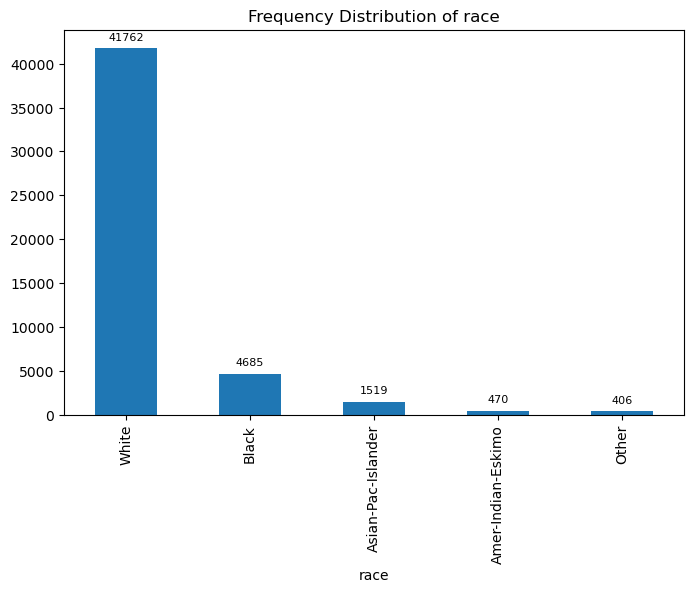

       
distribution of gender
---------------------------------


<Figure size 640x480 with 0 Axes>

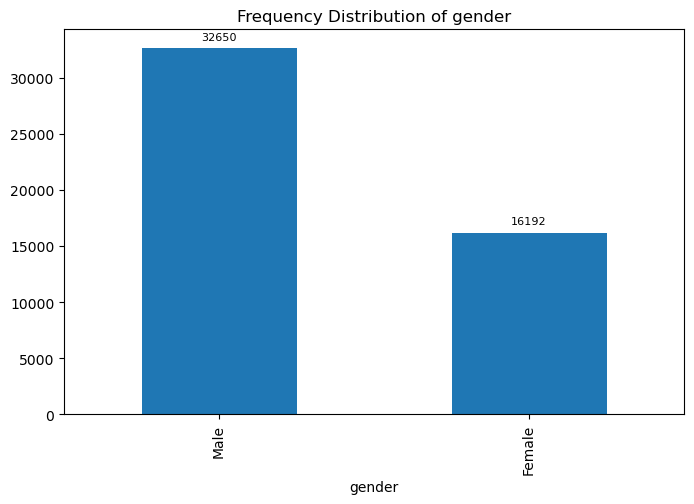

       
distribution of native-country
---------------------------------


<Figure size 640x480 with 0 Axes>

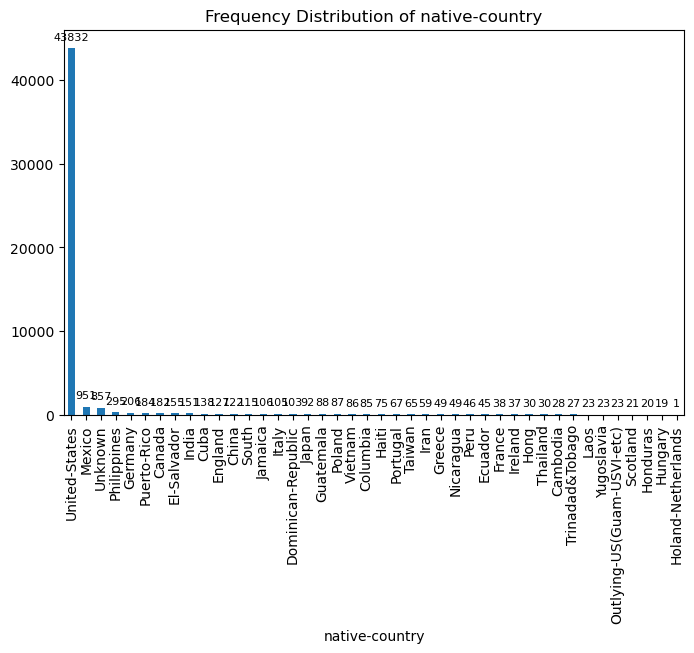

       
distribution of income
---------------------------------


<Figure size 640x480 with 0 Axes>

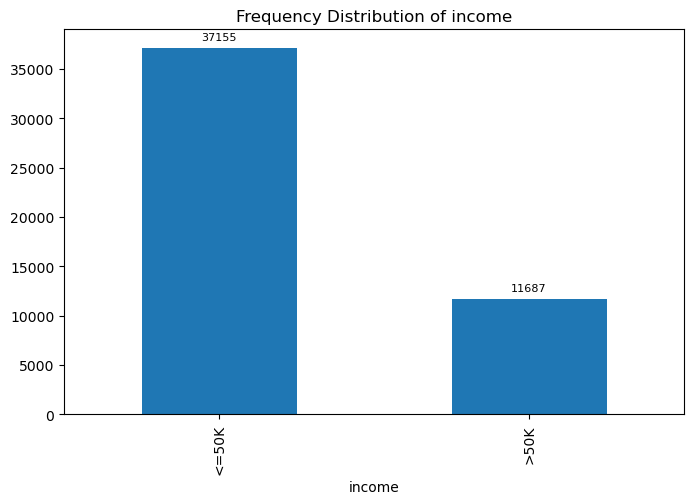

In [10]:
cat_cols = adult_data_v1.select_dtypes(include = 'object').columns 
for col in cat_cols:
    univariateAnalysis_category(adult_data_v1, col)
    

Bivariate Analysis
Checking for correlation

In [11]:
adult_data_num = adult_data_v1.select_dtypes(include = 'number')
def bivariate_num_num(df, df_num):
    print('pair plot')
    sns.pairplot(data = df, diag_kind = 'kde', hue = 'income')
    plt.show()
    
    print('heatmap')
    corr = df_num.corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=np.bool_))
    fig = plt.subplots(figsize=(20, 10))
    sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
    plt.show()
    
    

pair plot


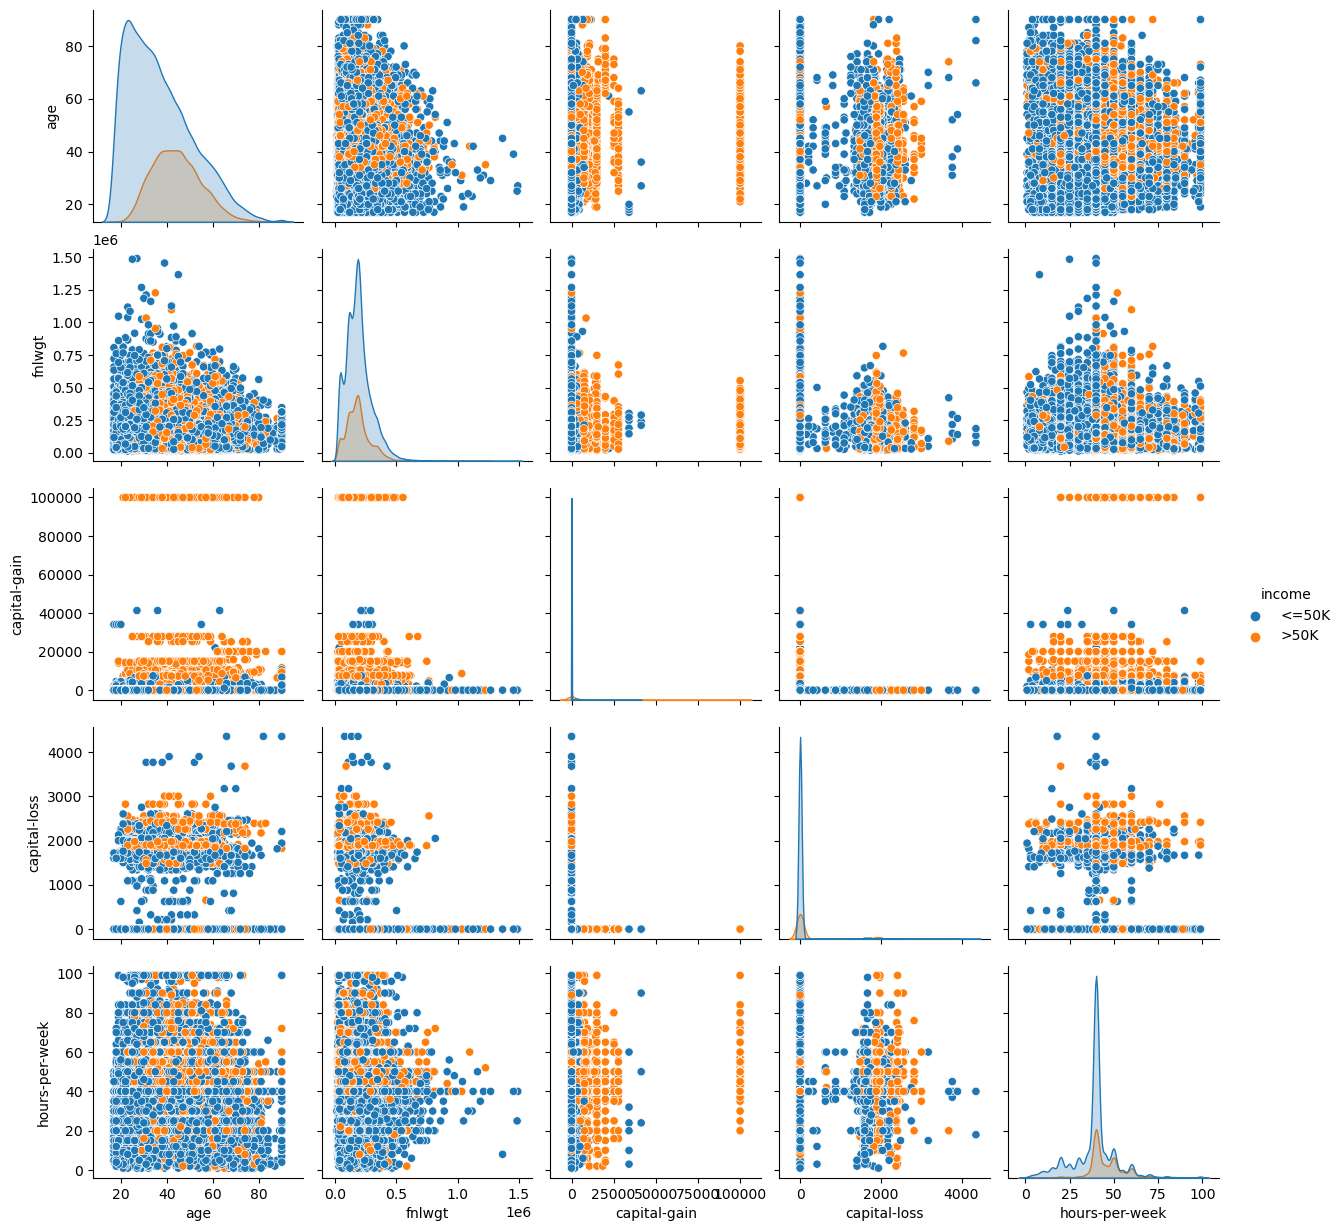

heatmap


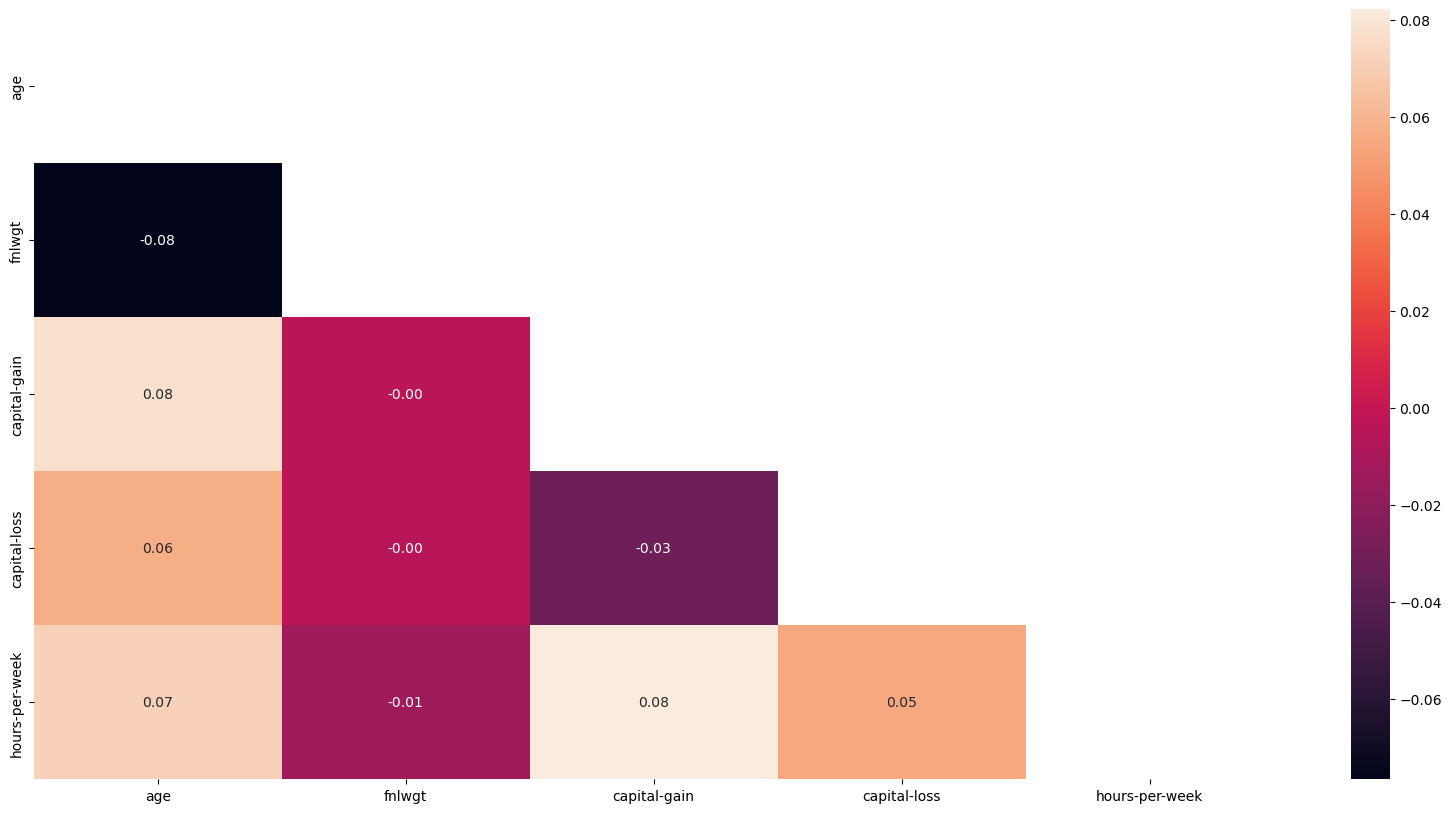

In [12]:
bivariate_num_num(adult_data_v1, adult_data_num)

Observations 
1. In the pairplot, for diagonals the data tends to overlap for both income class meaning numeric columns might not be very good diffrentiators.
2. Most numeric column pairs show correlation in single digits meaning there is no collinearity in the data.

# Outlier treatment

In [15]:
def treat_outlier(x):
    q25 = np.percentile(x,25)
    q75 = np.percentile(x,75)
    IQR = q75-q25 
    lower_bound = q25-(1.5*IQR)
    upper_bound = q75-(1.5*IQR)
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [16]:
adult_data_v2 = adult_data_v1.copy()

In [17]:
for i in ['age', 'fnlwgt', 'hours-per-week']:
    adult_data_v2[i]=treat_outlier(adult_data_v2[i])

Text(0.5, 1.0, 'Outlier treated data')

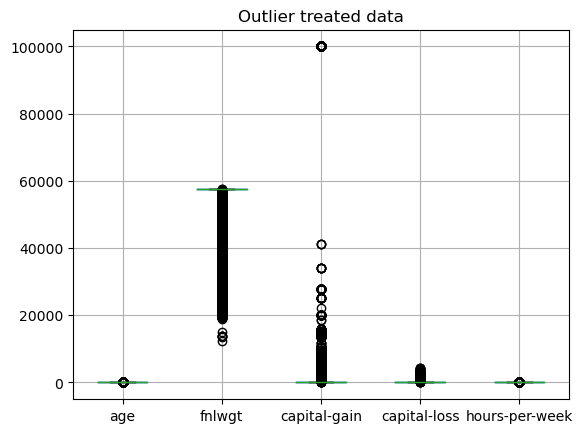

In [18]:
adult_data_v2.boxplot()
plt.title('Outlier treated data')

Label encoding
Converting all objects to categorical codes

In [20]:
adult_data_v3 = adult_data_v2.copy()

In [21]:
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Local-gov', 'Government', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Federal-gov', 'Government', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'State-gov', 'Government', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Self-emp-not-inc', 'Self-emp', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Self-emp-inc', 'Self-emp', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Unknown', 'Others', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Without-pay', 'Others', adult_data_v3['workclass'])
adult_data_v3['workclass'] = np.where(adult_data_v3['workclass'] == 'Never-worked', 'Others', adult_data_v3['workclass'])

In [22]:
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Preschool', 1, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '1st-4th', 1, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '5th-6th', 2, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '7th-8th', 2, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '9th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '10th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '11th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == '12th', 3, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'HS-grad', 4, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Assoc-acdm', 5, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Some-college', 5, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Assoc-voc', 5, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Prof-school', 6, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Bachelors', 6, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Masters', 7, adult_data_v3['education'])
adult_data_v3['education'] = np.where(adult_data_v3['education'] == 'Doctorate', 8, adult_data_v3['education'])

In [23]:
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Never-married', 'CurrentlySingle', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Widowed', 'CurrentlySingle', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Divorced', 'CurrentlySingle', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Separated', 'CurrentlySingle', adult_data_v3['marital-status'])

adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Married-civ-spouse', 'Married', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Married-spouse-absent', 'Married', adult_data_v3['marital-status'])
adult_data_v3['marital-status'] = np.where(adult_data_v3['marital-status'] == 'Married-AF-spouse', 'Married', adult_data_v3['marital-status'])

In [24]:
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Machine-op-inspct', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Farming-fishing', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Craft-repair', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Transport-moving', 'Blue Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Handlers-cleaners', 'Blue Collar', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Protective-serv', 'Security', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Armed-Forces', 'Security', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Prof-specialty', 'Services', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Tech-support', 'Services', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Sales', 'Services', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Priv-house-serv', 'Services', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Adm-clerical', 'White Collar', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Exec-managerial', 'White Collar', adult_data_v3['occupation'])

adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Unknown', 'Others', adult_data_v3['occupation'])
adult_data_v3['occupation'] = np.where(adult_data_v3['occupation'] == 'Other-service', 'Others', adult_data_v3['occupation'])

In [25]:
adult_data_v3.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,18.0,Private,57504.75,3,CurrentlySingle,Blue Collar,Black,Male,0,0,37.5,United-States,<=50K
1,18.0,Private,57504.75,4,Married,Blue Collar,White,Male,0,0,37.5,United-States,<=50K
2,18.0,Government,57504.75,5,Married,Security,White,Male,0,0,37.5,United-States,>50K
3,18.0,Private,57504.75,5,Married,Blue Collar,Black,Male,7688,0,37.5,United-States,>50K
4,18.0,Others,57504.75,5,CurrentlySingle,Others,White,Female,0,0,32.5,United-States,<=50K


In [26]:
adult_data_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   marital-status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   race            48842 non-null  object 
 7   gender          48842 non-null  object 
 8   capital-gain    48842 non-null  int64  
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  float64
 11  native-country  48842 non-null  object 
 12  income          48842 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.8+ MB


education columns has object data type but we have converted the data in it to numeric, so, we will convert it to int64.

In [27]:
adult_data_v3['education'] = adult_data_v3['education'].astype('int64')

In [28]:
adult_data_v3['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: education
Non-Null Count  Dtype
--------------  -----
48842 non-null  int64
dtypes: int64(1)
memory usage: 381.7 KB


In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [30]:
adult_data_v3['income'] = LE.fit_transform(adult_data_v3['income'])

In [31]:
adult_data_v3 = pd.get_dummies(adult_data_v3, drop_first= True).astype('int64')
display(adult_data_v3.shape)
print('\n')
adult_data_v3.head()

(48842, 61)

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,workclass_Others,workclass_Private,workclass_Self-emp,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,18,57504,3,0,0,37,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,18,57504,4,0,0,37,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,18,57504,5,0,0,37,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,18,57504,5,7688,0,37,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,18,57504,5,0,0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Logistic Regression
Splitting train and test data

In [32]:
X = adult_data_v3.drop('income', axis = 1)
Y = adult_data_v3['income']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 11)

In [34]:
print('train data')
display(X_train.head())
print('\ test data')
display(X_test.head())


train data


,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_Others,workclass_Private,workclass_Self-emp,marital-status_Married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
41117,18,57504,4,0,0,37,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
48216,18,57504,3,0,0,37,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1657,18,57504,4,0,0,37,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2914,18,57504,4,14344,0,37,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
39129,18,57504,3,0,0,32,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


\ test data


,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_Others,workclass_Private,workclass_Self-emp,marital-status_Married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
38455,18,22201,6,0,0,37,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
14731,18,57504,3,0,0,37,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23401,18,57504,8,0,0,35,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
35536,18,57504,6,0,0,32,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5422,18,57504,6,0,1902,37,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [35]:
y_train.value_counts(1)

income
0    0.76042
1    0.23958
Name: proportion, dtype: float64

In [36]:
y_test.value_counts(1)

income
0    0.761414
1    0.238586
Name: proportion, dtype: float64

Applying logistic regression model

In [37]:
model = LogisticRegression(solver = 'newton-cg', max_iter = 100000, penalty = 'none', verbose = True, n_jobs = 2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   40.0s finished


LogisticRegression(max_iter=100000, n_jobs=2, penalty='none',
                   solver='newton-cg', verbose=True)

In [38]:
ytrain_predict = model.predict(X_train)

In [40]:
trainModel_score = model.score(X_train, y_train)
print('accuracy score for train data: ',trainModel_score)

accuracy score for train data:  0.8481382900933049


predicting using model

In [41]:
ytest_predict = model.predict(X_test)

In [42]:
testModel_score = model.score(X_test, y_test)
print('accuracy score for test data: ', testModel_score)

accuracy score for test data:  0.8463113355626835


For test and train data, model has almost similar accuracy scores, this means that model is performing well. There is no issue of overfitting or underfitting. However, the income data is skewed, due to which accuracy is not a very good score for evaluation rather f1-score will be a better metric for which we will use metrics classification report.